# **CS 4361/5361 Machine Learning Practice Exam 2** 

## **Question 1**

Instead of using pixel values, we will classify the MNIST dataset using as features the sums of the rows and columns of the images. That is, each image can be represented by 56 attributes: the sum of its 28 rows and the sum of its 28 columns.

For example, suppose we have a 4-by-4 image as shown below (the green boxes). Then we could represent the image by the 8 attributes included in the yellow boxes ([3.00, 1.75, 4.25, 5.75, 6.00, 0.50, 5.00, 3.25]); with the first 4 elements representing the mean internsity of every column and the last 4 representing the mean intensities of every row.

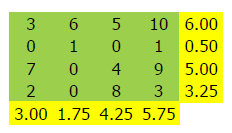

Write a function that extacts the features described above and apply it to the MNIST dataset.

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [63]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [11]:
x_test.shape

(60000, 28, 28)

In [64]:
def mean_rows_cols(X):
  R = np.mean(X, axis = 1)
  C = np.mean(X, axis= 2)
  mean = np.hstack((R,C))
  return mean

In [65]:
x_test_s = mean_rows_cols(np.float32(x_test)/255)
x_train_s = mean_rows_cols(np.float32(x_train)/255)
print(x_train_s.shape)
print(x_test_s.shape)

(60000, 56)
(10000, 56)


Write a program to classify the MNIST dataset with a Support Vector Machine using the representation described above. 

In [ ]:
model = SVC()
model.fit(x_train_s , y_train)
pred = model.predict(x_test_s)

In [29]:
print(accuracy_score(pred,y_test))

0.9086


Write a program to classify the MNIST dataset with a Support Vector Machine using the representation described above after applying PCA and selecting the first 10 principal components.

In [49]:
pca = PCA(n_components = 10)
pca.fit(x_train_s)

x_train_pca = pca.transform(x_train_s)
x_test_pca = pca.transform(x_test_s)

In [50]:
model = SVC()
model.fit(x_train_pca , y_train)
pred = model.predict(x_test_pca)

In [51]:
print(accuracy_score(pred,y_test))

0.8904


Write a program that classifies the MNIST dataset using the feautures described above (sums of rows and columns) using a dense neural network with 2 hidden layers with 56 units each, implemented in Keras. 

In [54]:
from keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from keras.utils.vis_utils import plot_model

In [52]:
def dense_model(inputs = 56 , hidden_1 = 56, hidden_2 = 56, classes = 10):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(hidden_1,input_shape=(inputs,),activation='relu'))
  model.add(tf.keras.layers.Dense(hidden_2, activation='relu'))
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  return model

In [66]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

In [67]:
dense_network = dense_model()
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

history = dense_network.fit(
    x_train_s, y_train_onehot,
    epochs =  20, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test_s, y_test_onehot),
)

all_history.append(history)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 56)                3192      
                                                                 
 dense_22 (Dense)            (None, 56)                3192      
                                                                 
 dense_23 (Dense)            (None, 10)                570       
                                                                 
Total params: 6,954
Trainable params: 6,954
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 1.3722 - accuracy: 0.6065 - val_loss: 0.9258 - val_accuracy: 0.6942
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.8224 - accuracy: 0.7391 - val_loss: 0.7501 - val_accuracy: 0.7723
Epoch 3/20
235/235 [============

NameError: ignored

## **Question 2**

The following code implements a vgg-style network to classify the CIFAR-10 dataset. 

Evaluate the effects of each of the following changes to the original architecture. 

*   Removing the dense layer before the classification layer. 
*   Replacing the max pooling operators by convolutions with a 2-by-2 stride. 
*   Decreasing the number of convolutional filters to half the original number in each layer. 
*   Increasing the size of convolution kernels to twice their original size (in each dimension).


In [89]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = np.float32(x_train)/255
x_test = np.float32(x_test)/255

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [90]:
def plot_results(all_history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  fig, ax = plt.subplots()
  ax.plot(accuracy,label = 'train')
  ax.plot(val_accuracy,label = 'test')
  ax.set_title('Accuracy')
  ax.legend(loc='lower right')
  fig, ax = plt.subplots()
  ax.plot(loss,label = 'train')
  ax.plot(val_loss,label = 'test')
  ax.set_title('Loss')
  ax.legend(loc='upper right')
  plt.show()

In [70]:
def vgg3(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

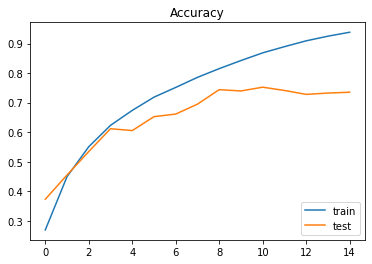

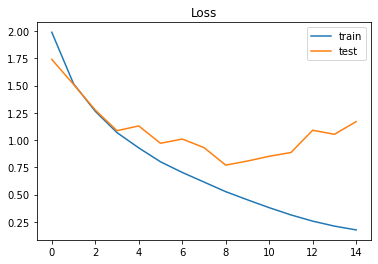

In [71]:
cnn = vgg3(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train,
    epochs =  15, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

### **Removing the dense layer before the classification layer.**

In [72]:
def vgg3_1(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  return model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

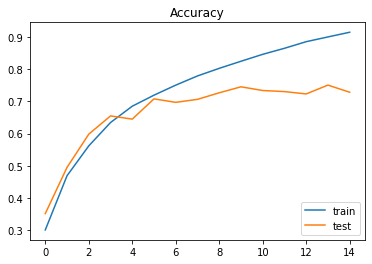

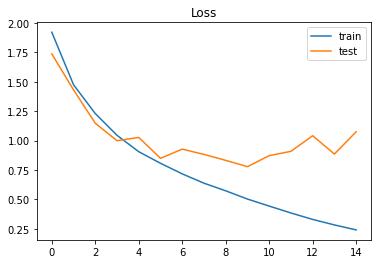

In [73]:
cnn = vgg3_1(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train,
    epochs =  15, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

In [75]:
def vgg3_2(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

  model.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation="relu"))

  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

  model.add(Conv2D(64, kernel_size=(2, 2), padding='same', activation="relu"))

  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  
  model.add(Conv2D(128, kernel_size=(2, 2), padding='same', activation="relu"))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        4128      
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        16448     
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 128)     

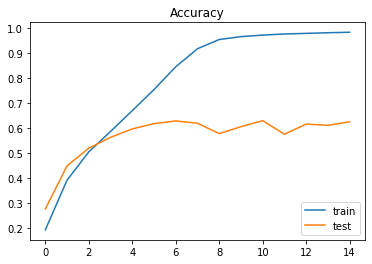

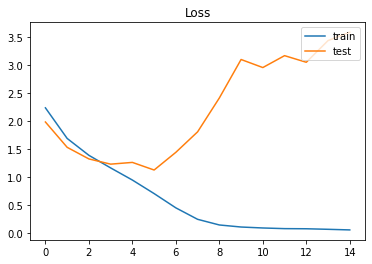

In [76]:
cnn = vgg3_2(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train,
    epochs =  15, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

In [79]:
def vgg3_3(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(16, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                

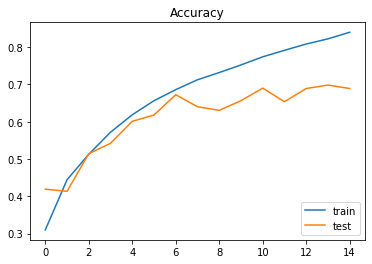

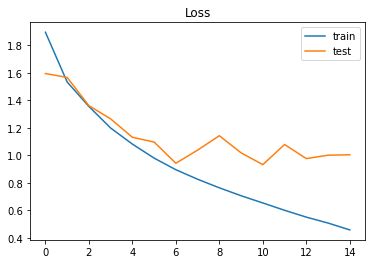

In [80]:
cnn = vgg3_3(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train,
    epochs =  15, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

In [93]:
def vgg3_4(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2),activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2),padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2),padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), strides=(2, 2),padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), strides=(2, 2),padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [94]:
cnn = vgg3_4(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train,
    epochs =  15, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

ValueError: ignored